In [1]:
# Imports
import pandas as pd
import numpy as np
import datetime
from datetime import time as dtime
from datetime import timedelta

In [4]:
# importing historical data from 2008 to 2021
SPY_Data = pd.read_csv('SPY_1min_data.csv', usecols=['date', 'open', 'high', 'low', 'close', 'volume'])

# Parse datetime column and divide in 2 columns
# SPY_Data['datetime'] = pd.to_datetime(SPY_Data['date'].str.strip(), format='%Y%m%d %H:%M:%S')
SPY_Data.rename(columns={
    'date': 'datetime'
}, inplace=True)

SPY_Data['datetime'] = pd.to_datetime(SPY_Data['datetime'])

SPY_Data['Date'] = SPY_Data['datetime'].dt.date
SPY_Data['Time'] = SPY_Data['datetime'].dt.time

# sorting the data by the time column to make sure it is consistent
SPY_Data.sort_values('datetime', inplace=True)

# Drop original 'date' column
# SPY_Data.drop(columns=['date'], inplace=True)

# Filter for regular trading hours using datetime column
SPY_Data = SPY_Data[SPY_Data['datetime'].dt.time >= pd.to_datetime("09:30").time()]
SPY_Data = SPY_Data[SPY_Data['datetime'].dt.time <= pd.to_datetime("16:00").time()]

# Making sure the order of the columns stays the same 
SPY_Data = SPY_Data[['Date', 'Time', 'open', 'high', 'low', 'close', 'volume']]
SPY_Data

,Date,Time,open,high,low,close,volume
0,2019-12-31,09:30:00,320.52,320.53,320.24,320.27,4255
1,2019-12-31,09:31:00,320.27,320.34,320.15,320.33,2049
2,2019-12-31,09:32:00,320.35,320.97,320.35,320.97,2953
3,2019-12-31,09:33:00,320.98,321.05,320.81,320.82,2529
4,2019-12-31,09:34:00,320.83,320.91,320.74,320.80,1373
...,...,...,...,...,...,...,...
507925,2025-08-01,15:55:00,622.10,622.29,621.64,622.25,7142
507926,2025-08-01,15:56:00,622.27,622.53,622.12,622.46,6161
507927,2025-08-01,15:57:00,622.46,622.53,622.22,622.38,7356
507928,2025-08-01,15:58:00,622.39,622.44,621.95,621.96,10144


In [9]:
# importing historical data from 2008 to 2021
QQQ_Data = pd.read_csv('QQQ_1min_data.csv', usecols=['date', 'open', 'high', 'low', 'close', 'volume'])

# Parse datetime column and divide in 2 columns
# SPY_Data['datetime'] = pd.to_datetime(SPY_Data['date'].str.strip(), format='%Y%m%d %H:%M:%S')
QQQ_Data.rename(columns={
    'date': 'datetime'
}, inplace=True)

QQQ_Data['datetime'] = pd.to_datetime(QQQ_Data['datetime'])

QQQ_Data['Date'] = QQQ_Data['datetime'].dt.date
QQQ_Data['Time'] = QQQ_Data['datetime'].dt.time

# sorting the data by the time column to make sure it is consistent
QQQ_Data.sort_values('datetime', inplace=True)

# Drop original 'date' column
# SPY_Data.drop(columns=['date'], inplace=True)

# Filter for regular trading hours using datetime column
QQQ_Data = QQQ_Data[QQQ_Data['datetime'].dt.time >= pd.to_datetime("09:30").time()]
QQQ_Data = QQQ_Data[QQQ_Data['datetime'].dt.time <= pd.to_datetime("16:00").time()]

# Making sure the order of the columns stays the same 
QQQ_Data = QQQ_Data[['Date', 'Time', 'open', 'high', 'low', 'close', 'volume']]
QQQ_Data

,Date,Time,open,high,low,close,volume
0,2019-12-31,09:30:00,211.62,211.62,211.33,211.34,4340
1,2019-12-31,09:31:00,211.34,211.43,211.20,211.43,2240
2,2019-12-31,09:32:00,211.44,211.99,211.43,211.98,4415
3,2019-12-31,09:33:00,211.98,212.04,211.86,211.89,2733
4,2019-12-31,09:34:00,211.90,211.91,211.76,211.85,1157
...,...,...,...,...,...,...,...
520475,2025-08-05,15:11:00,560.67,560.77,560.60,560.63,635
520476,2025-08-05,15:12:00,560.66,560.78,560.54,560.78,241
520477,2025-08-05,15:13:00,560.79,560.83,560.58,560.62,423
520478,2025-08-05,15:14:00,560.63,560.75,560.62,560.71,312


In [7]:
# Rebuild datetime
SPY_Data['datetime'] = pd.to_datetime(
    SPY_Data['Date'].astype(str) + ' ' + SPY_Data['Time'].astype(str)
)

SPY_1h = (
    SPY_Data
    .set_index('datetime')
    .resample('60min', origin='start_day', offset='30min')
    .agg({'open':'first','high':'max','low':'min','close':'last','volume':'sum'})
    .dropna(subset=['open','high','low','close'])
    .reset_index()
)

SPY_1h['Date'] = SPY_1h['datetime'].dt.date
SPY_1h['Time'] = SPY_1h['datetime'].dt.time
SPY_1h = SPY_1h[['Date','Time','open','high','low','close','volume']]
SPY_1h

,Date,Time,open,high,low,close,volume
0,2019-12-31,09:30:00,320.52,321.54,320.15,320.78,55212
1,2019-12-31,10:30:00,320.78,320.87,320.39,320.51,36136
2,2019-12-31,11:30:00,320.51,320.88,320.30,320.66,26634
3,2019-12-31,12:30:00,320.65,320.82,320.58,320.73,21344
4,2019-12-31,13:30:00,320.72,321.03,320.72,321.02,26587
...,...,...,...,...,...,...,...
9779,2025-08-01,11:30:00,621.51,624.97,621.38,624.21,103595
9780,2025-08-01,12:30:00,624.21,624.46,620.33,620.57,137281
9781,2025-08-01,13:30:00,620.57,621.81,619.29,621.62,108451
9782,2025-08-01,14:30:00,621.63,623.11,620.95,621.79,142412


In [10]:
# Rebuild datetime
QQQ_Data['datetime'] = pd.to_datetime(
    QQQ_Data['Date'].astype(str) + ' ' + QQQ_Data['Time'].astype(str)
)

QQQ_1h = (
    QQQ_Data
    .set_index('datetime')
    .resample('60min', origin='start_day', offset='30min')
    .agg({'open':'first','high':'max','low':'min','close':'last','volume':'sum'})
    .dropna(subset=['open','high','low','close'])
    .reset_index()
)

QQQ_1h['Date'] = QQQ_1h['datetime'].dt.date
QQQ_1h['Time'] = QQQ_1h['datetime'].dt.time
QQQ_1h = QQQ_1h[['Date','Time','open','high','low','close','volume']]
QQQ_1h

,Date,Time,open,high,low,close,volume
0,2019-12-31,09:30:00,211.62,212.52,211.20,211.82,44402
1,2019-12-31,10:30:00,211.82,211.98,211.60,211.68,18653
2,2019-12-31,11:30:00,211.67,212.03,211.51,211.92,13959
3,2019-12-31,12:30:00,211.91,212.03,211.88,211.94,8245
4,2019-12-31,13:30:00,211.95,212.13,211.83,212.12,11025
...,...,...,...,...,...,...,...
9266,2025-08-05,10:30:00,563.95,564.00,560.30,561.11,68864
9267,2025-08-05,11:30:00,561.09,562.08,559.73,561.76,39640
9268,2025-08-05,12:30:00,561.73,562.41,560.30,562.05,27965
9269,2025-08-05,13:30:00,562.06,563.07,561.23,561.31,29166


In [14]:
# Load SPY and QQQ hourly data
SPY_1h['datetime'] = pd.to_datetime(SPY_1h['Date'].astype(str) + " " + SPY_1h['Time'].astype(str))
QQQ_1h['datetime'] = pd.to_datetime(QQQ_1h['Date'].astype(str) + " " + QQQ_1h['Time'].astype(str))

df = pd.merge(
    SPY_1h[['datetime','high','low','close']],
    QQQ_1h[['datetime','high','low','close']],
    on='datetime',
    suffixes=('_SPY','_QQQ')
)
df

,datetime,high_SPY,low_SPY,close_SPY,high_QQQ,low_QQQ,close_QQQ
0,2019-12-31 09:30:00,321.54,320.15,320.78,212.52,211.20,211.82
1,2019-12-31 10:30:00,320.87,320.39,320.51,211.98,211.60,211.68
2,2019-12-31 11:30:00,320.88,320.30,320.66,212.03,211.51,211.92
3,2019-12-31 12:30:00,320.82,320.58,320.73,212.03,211.88,211.94
4,2019-12-31 13:30:00,321.03,320.72,321.02,212.13,211.83,212.12
...,...,...,...,...,...,...,...
9240,2025-08-01 10:30:00,624.07,621.39,621.51,557.26,554.32,554.38
9241,2025-08-01 11:30:00,624.97,621.38,624.21,557.85,554.23,556.96
9242,2025-08-01 12:30:00,624.46,620.33,620.57,557.22,552.84,553.13
9243,2025-08-01 13:30:00,621.81,619.29,621.62,554.30,551.70,554.12


In [28]:
from scipy.signal import argrelextrema
import numpy as np

# identifies local maximas and local minimas. Order 3 = looks 3 bars behind and 3 bars further
def find_swings(series, order=3):
    highs = argrelextrema(series.values, np.greater_equal, order=order)[0]
    lows  = argrelextrema(series.values, np.less_equal, order=order)[0]
    return highs, lows

highs_spy, lows_spy = find_swings(df['high_SPY'])
highs_qqq, lows_qqq = find_swings(df['high_QQQ'])


In [39]:
swing_high_times = df.loc[highs_spy, 'datetime']
swing_high_times

0      2019-12-31 09:30:00
7      2020-01-02 09:30:00
13     2020-01-02 15:30:00
17     2020-01-03 12:30:00
27     2020-01-06 15:30:00
               ...        
9187   2025-07-21 11:30:00
9207   2025-07-24 13:30:00
9215   2025-07-28 09:30:00
9221   2025-07-29 09:30:00
9233   2025-07-31 09:30:00
Name: datetime, Length: 896, dtype: datetime64[ns]

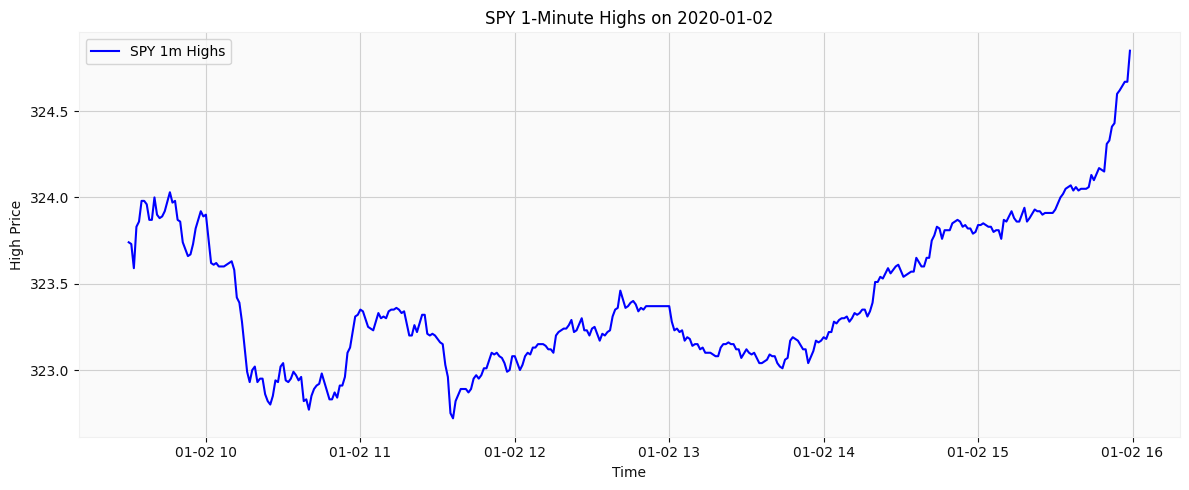

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: choose the date you want
day = pd.to_datetime("2020-01-02").date()

# Filter for that day
spy_day = SPY_Data[SPY_Data['Date'] == day]

# Plot the highs
plt.figure(figsize=(12,5))
plt.plot(spy_day['datetime'], spy_day['high'], label='SPY 1m Highs', color='blue')

plt.title(f"SPY 1-Minute Highs on {day}")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


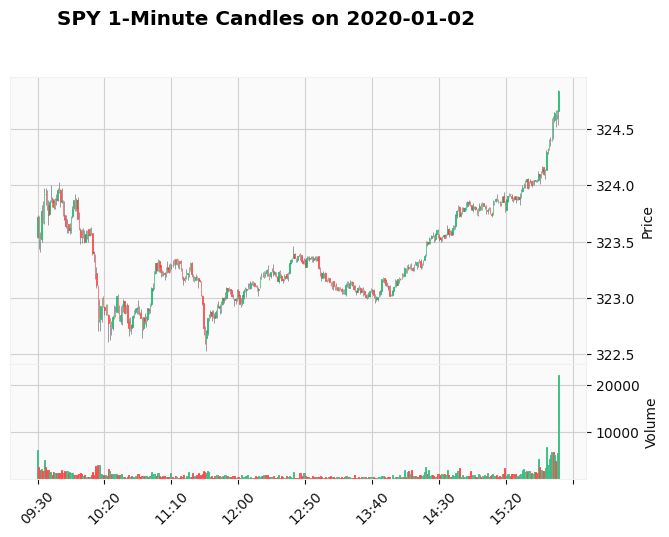

In [48]:
import mplfinance as mpf
import pandas as pd

# Pick your day
day = pd.to_datetime("2020-01-02").date()

# Filter SPY_Data to that day
spy_day = SPY_Data[SPY_Data['Date'] == day].copy()

# Set datetime index
spy_day.set_index("datetime", inplace=True)

# Rename columns to what mplfinance expects
spy_day = spy_day.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

mpf.plot(
    spy_day,
    type='candle',      # candlestick chart
    style='yahoo',      # or 'charles', 'nightclouds', 'binance', etc.
    title=f"SPY 1-Minute Candles on {day}",
    ylabel='Price',
    ylabel_lower='Volume',
    volume=True       # show volume below
)


In [ ]:
divergences = []

for i in range(1, len(df)):
    # bearish SMT: SPY makes HH, QQQ fails
    if i in highs_spy:
        last_high_spy = df['high_SPY'].iloc[i]
        last_high_qqq = df['high_QQQ'].iloc[i]

        # compare to previous highs
        prev_high_spy = df['high_SPY'].iloc[i-5:i].max()
        prev_high_qqq = df['high_QQQ'].iloc[i-5:i].max()

        if last_high_spy > prev_high_spy and last_high_qqq <= prev_high_qqq:
            divergences.append((df['datetime'].iloc[i], "Bearish SMT"))

    # bullish SMT: SPY makes LL, QQQ fails
    if i in lows_spy:
        last_low_spy = df['low_SPY'].iloc[i]
        last_low_qqq = df['low_QQQ'].iloc[i]

        prev_low_spy = df['low_SPY'].iloc[i-5:i].min()
        prev_low_qqq = df['low_QQQ'].iloc[i-5:i].min()

        if last_low_spy < prev_low_spy and last_low_qqq >= prev_low_qqq:
            divergences.append((df['datetime'].iloc[i], "Bullish SMT"))


In [26]:
len(divergences)/(252*5)

0.17222222222222222

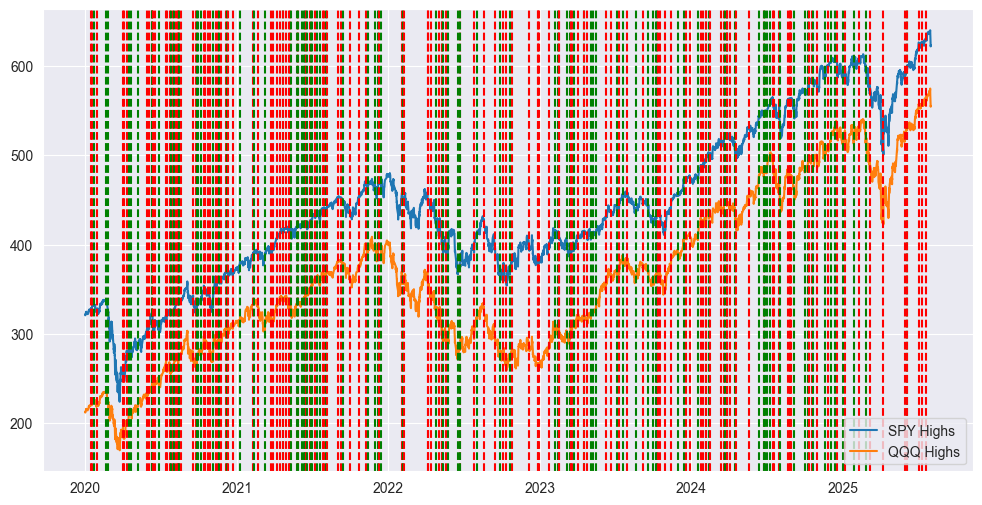

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['high_SPY'], label="SPY Highs")
plt.plot(df['datetime'], df['high_QQQ'], label="QQQ Highs")

for t, kind in divergences:
    plt.axvline(t, color='red' if "Bearish" in kind else 'green', linestyle='--')

plt.legend()
plt.show()
